In [21]:
import torch



import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from trainer import Trainer
from utils.plotting import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:161:::  

Using dataset specific configuration and not global 




<string>:26:::  

 2025-08-01 17:35:14 starting optimization of bigclam on sbm3x3 on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 0.01,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 10000,
        "early_stop": 0
    }
}
Fitting vanilla model...


<string>:52:::  
staring fit_feats for 10000 iterations


<string>:69:::  
fit wrapper fit_feats, plotting state at iter 9999


<string>:69:::  
fit wrapper fit_feats, plotting state at iter 9999


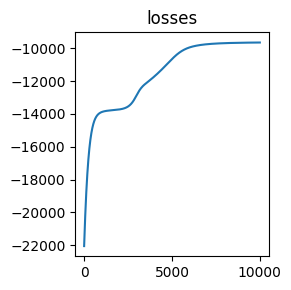

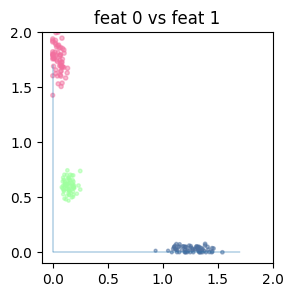

TEST accuracy.
Latest:
losses: -9648.326171875 
Best:
losses: -9648.326171875 at iteration 9999


<string>:59:::  



FINISHED train 
 last accuracies:
test
key='losses': -9648.326171875




<string>:74:::  

train_model_on_params on bigclam sbm3x3 
took 13.510205030441284 seconds


In [60]:
%autoreload 2
'''Experiment: bigclam finds bipartite structures as nested communities'''

data_sbm3x3 = import_dataset('sbm3x3')

config_triplets = [
    ['clamiter_init', 'dim_feat', 2],
    ['feat_opt', 'n_iter', 10000]
]

trainer_bigclam_sbm3x3 = Trainer(
    dataset=data_sbm3x3, 
    model_name='bigclam',
    config_triplets_to_change=config_triplets,
    device=device)

_ = trainer_bigclam_sbm3x3.train()

Data(edge_index=[2, 638], y=[50, 2], edge_attr=[638], num_nodes=50, gt_nomalous=[50], name='bipartiteHalf')
torch.Size([2, 638])


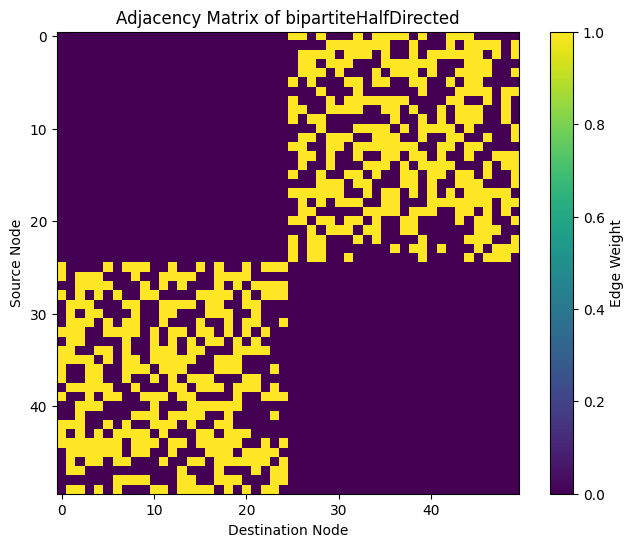



/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:161:::  

Using dataset specific configuration and not global 




<string>:26:::  

 2025-08-01 17:33:32 starting optimization of bigclam on bipartiteHalf on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 50000,
        "early_stop": 0
    }
}
Fitting vanilla model...


<string>:52:::  
staring fit_feats for 50000 iterations


<string>:69:::  
fit wrapper fit_feats, plotting state at iter 49999


<string>:69:::  
fit wrapper fit_feats, plotting state at iter 49999


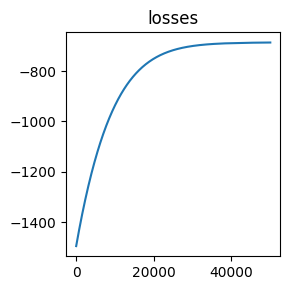

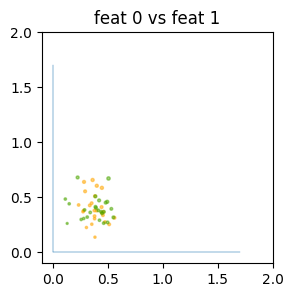

TEST accuracy.
Latest:
losses: -686.5700073242188 
Best:
losses: -686.5700073242188 at iteration 49999


<string>:59:::  



FINISHED train 
 last accuracies:
test
key='losses': -686.5700073242188




<string>:74:::  

train_model_on_params on bigclam bipartiteHalf 
took 11.450800895690918 seconds
torch.Size([50, 50])


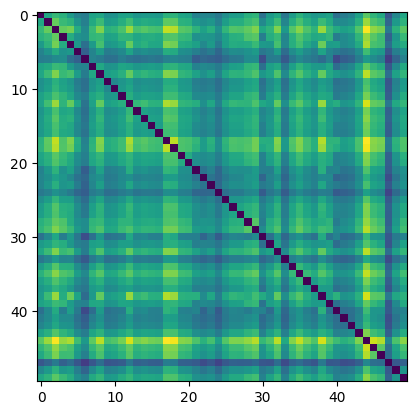

In [59]:
'''Experiment: bigclam finds bipartite structures as nested communities'''

# data_sbm3x3 = import_dataset('sbm3x3')
# data_sbm3x3 = import_dataset('bipartiteHalfDirected')
data_sbm3x3 = import_dataset('bipartiteHalf')

print(data_sbm3x3)
config_triplets = [
    ['clamiter_init', 'dim_feat', 2],
    ['feat_opt', 'n_iter', 50000]
]
# Create an adjacency matrix for visualization as a matrix (like imshow)
adj_matrix = np.zeros((data_sbm3x3.num_nodes, data_sbm3x3.num_nodes))

print(data_sbm3x3.edge_index.shape)
# Populate the adjacency matrix with weights
for i in range(data_sbm3x3.edge_index.shape[1]):
    src = data_sbm3x3.edge_index[0, i]
    dst = data_sbm3x3.edge_index[1, i]
    weight = data_sbm3x3.edge_attr[i]
    # print(f"src: {src}, dst: {dst}, weight: {weight}")
    adj_matrix[src, dst] = weight

# Plot the adjacency matrix
plt.figure(figsize=(8, 6))
plt.imshow(adj_matrix, cmap='viridis', interpolation='nearest')
plt.title("Adjacency Matrix of bipartiteHalfDirected")
plt.colorbar(label="Edge Weight")
plt.xlabel("Destination Node")
plt.ylabel("Source Node")
plt.show()


trainer_bigclam_sbm3x3 = Trainer(
    dataset=data_sbm3x3, 
    model_name='bigclam',
    config_triplets_to_change=config_triplets,
    device=device)

_ = trainer_bigclam_sbm3x3.train()

print(trainer_bigclam_sbm3x3.get_prob_graph().shape)
plt.imshow(trainer_bigclam_sbm3x3.get_prob_graph(), cmap='viridis')
plt.show()


Data(edge_index=[2, 296], y=[50, 2], edge_attr=[296], num_nodes=50, gt_nomalous=[50], name='bipartiteHalfDirected')
tensor([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]], dtype=torch.int32)


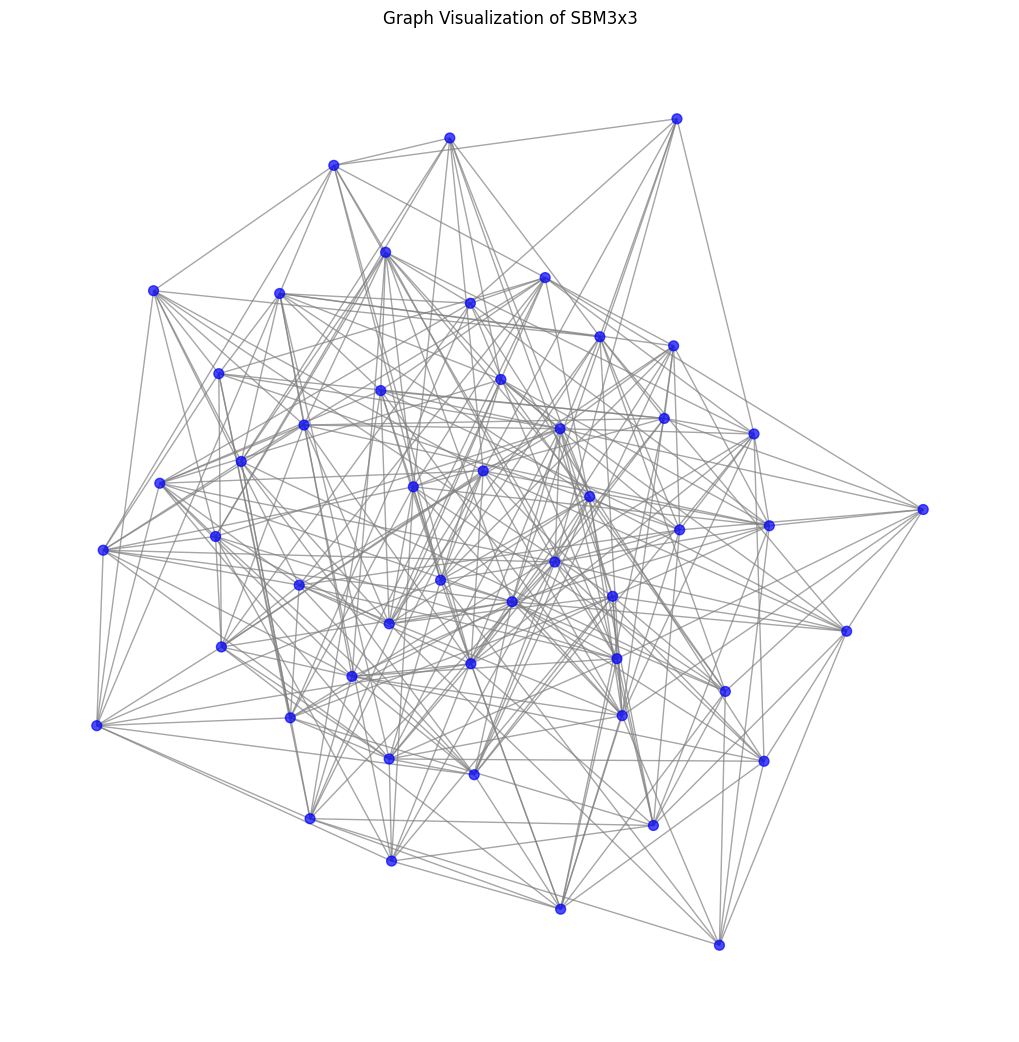

In [36]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
print(data_sbm3x3)
# Suppose your dataset is loaded as follows:
data = data_sbm3x3
print(data_sbm3x3.y)
# Convert to NetworkX
G = nx.Graph()
edges = data.edge_index.t().tolist()
G.add_edges_from(edges)

# Color nodes by anomaly or label
if hasattr(data, 'gt_nomalous'):
    node_color = ['red' if is_anom else 'blue' for is_anom in data.gt_nomalous]
else:
    node_color = data.y.argmax(dim=1).tolist()

# Plot
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=node_color, node_size=50, edge_color='gray', alpha=0.7)
plt.title('Graph Visualization of SBM3x3')
plt.show()


/var/folders/rf/fxvb25cs2g3gswh_tlqb19j80000gn/T/ipykernel_29511/3195004869.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_classes)  # Or 'Set1', 'Accent', etc.


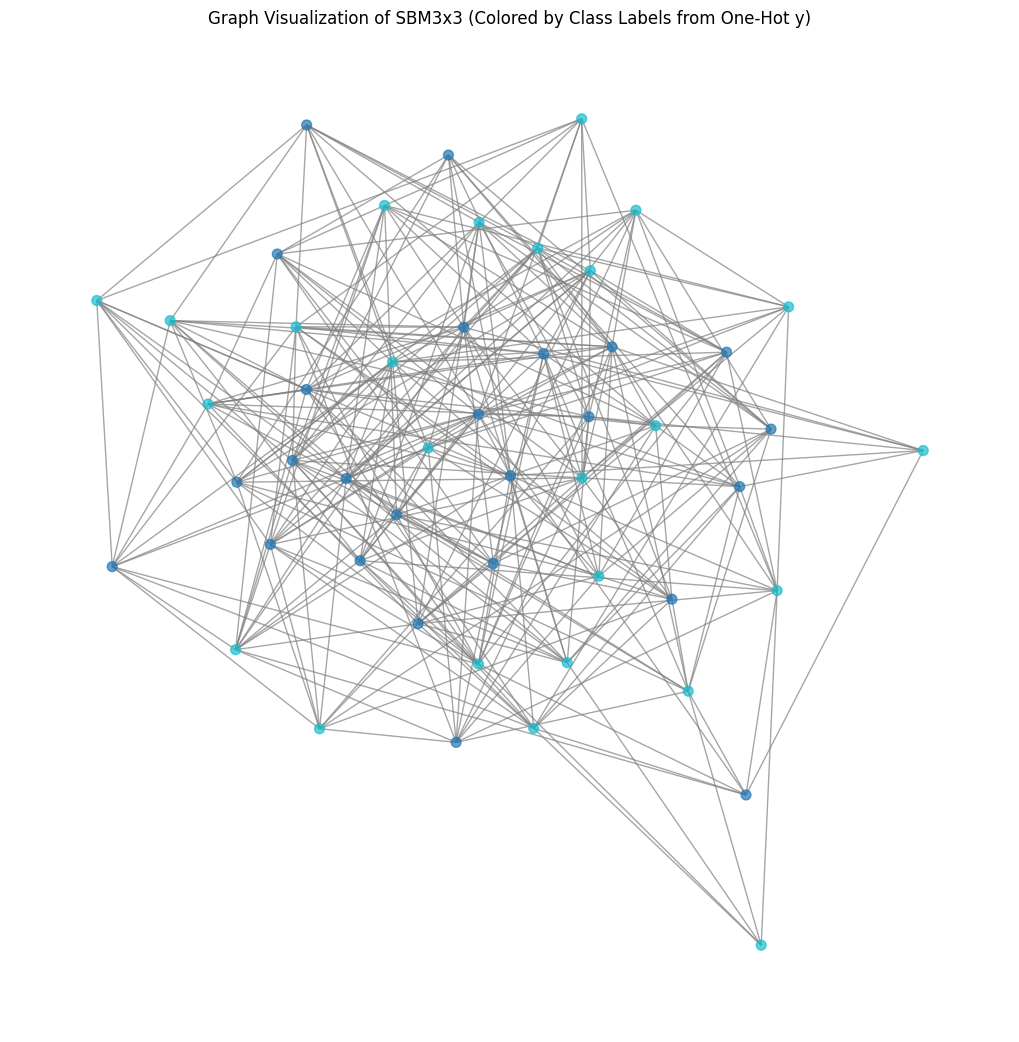

In [24]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
import matplotlib.colors as mcolors

# Load your data
data = data_sbm3x3

# Convert to NetworkX
G = nx.Graph()
edges = data.edge_index.t().tolist()
G.add_edges_from(edges)

# Convert one-hot labels to class indices
class_labels = data.y.argmax(dim=1).tolist()  # Converts [0,0,1] to 2, etc.

# Assign a distinct color to each class
num_classes = data.y.shape[1]
cmap = plt.cm.get_cmap('tab10', num_classes)  # Or 'Set1', 'Accent', etc.
node_color = [cmap(label) for label in class_labels]

# Plot the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=node_color, node_size=50, edge_color='gray', alpha=0.7, with_labels=False)
plt.title('Graph Visualization of SBM3x3 (Colored by Class Labels from One-Hot y)')
plt.show()


/var/folders/rf/fxvb25cs2g3gswh_tlqb19j80000gn/T/ipykernel_29511/4221584544.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_classes)


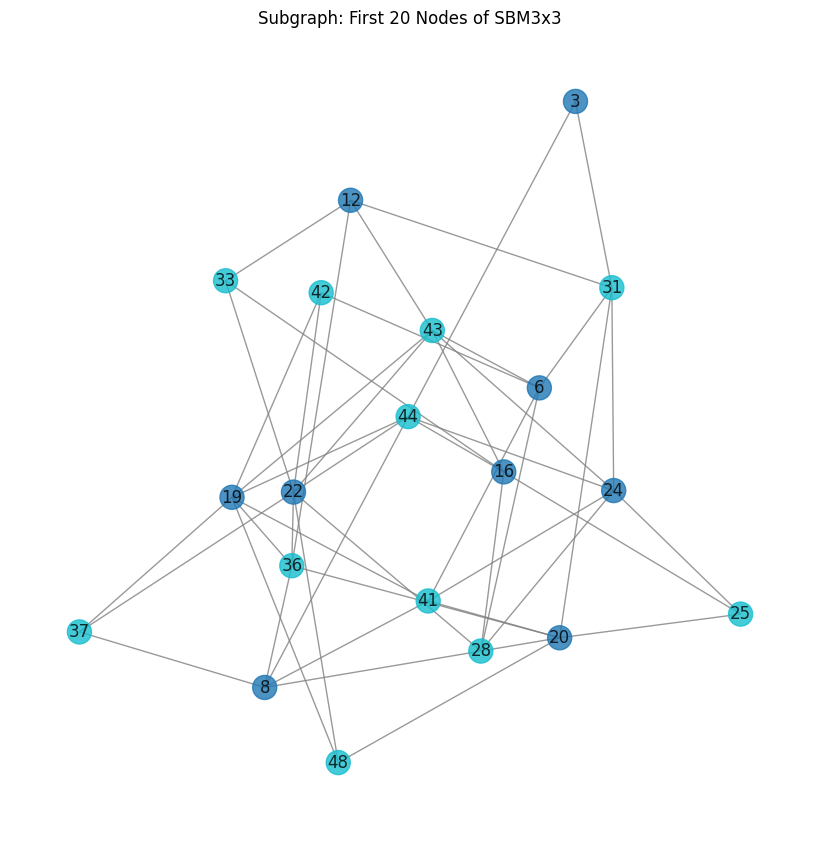

In [25]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
import matplotlib.colors as mcolors

# Load your data
data = data_sbm3x3

# Convert to NetworkX
G = nx.Graph()
edges = data.edge_index.t().tolist()
G.add_edges_from(edges)

# Convert one-hot labels to class indices
class_labels = data.y.argmax(dim=1).tolist()

# Assign a distinct color to each class
num_classes = data.y.shape[1]
cmap = plt.cm.get_cmap('tab10', num_classes)
node_color_map = [cmap(label) for label in class_labels]

# Select first 20 nodes
import random
subset_nodes = random.sample(range(data.num_nodes), 20)
subgraph = G.subgraph(subset_nodes)

# Extract corresponding colors
subset_colors = [node_color_map[n] for n in subgraph.nodes()]

# Plot the subgraph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, node_color=subset_colors, node_size=300, edge_color='gray', alpha=0.8, with_labels=True)
plt.title("Subgraph: First 20 Nodes of SBM3x3")
plt.show()


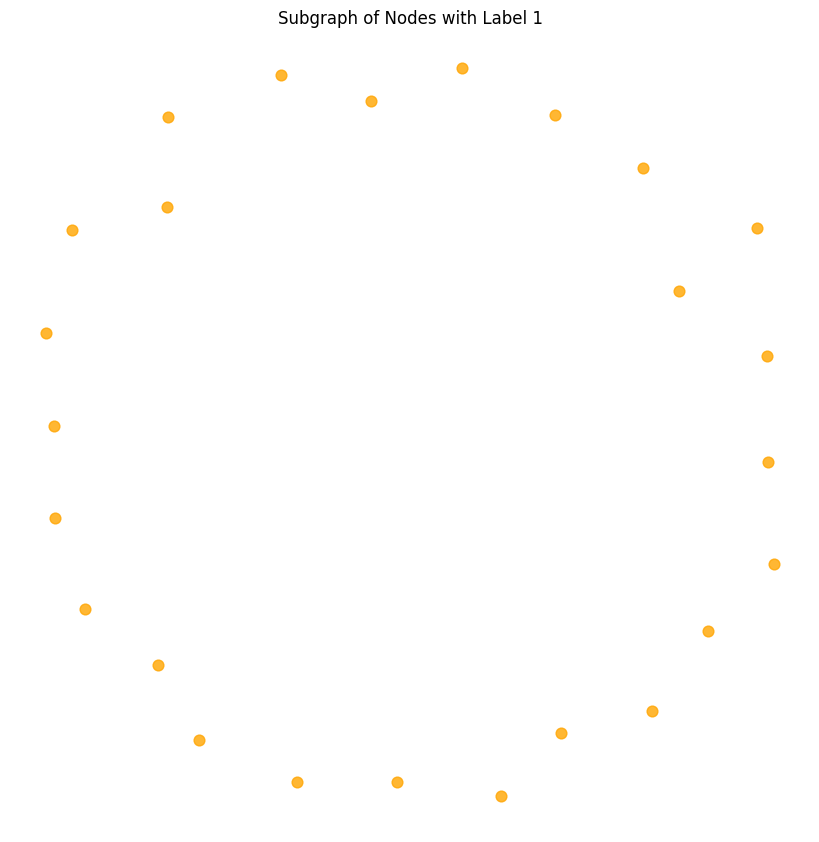

Is directed: False


In [26]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data

# Load your data
data = data_sbm3x3

# Convert to NetworkX
G = nx.Graph()
edges = data.edge_index.t().tolist()
G.add_edges_from(edges)

# Get class labels from one-hot vectors
labels = data.y.argmax(dim=1)

# Select nodes with label 1
label_1_nodes = [i for i, label in enumerate(labels) if label == 0]

# Create subgraph with only label-1 nodes and edges between them
subgraph = G.subgraph(label_1_nodes)

# Draw the subgraph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, node_color='orange', node_size=60, edge_color='gray', alpha=0.8)
plt.title("Subgraph of Nodes with Label 1")
plt.show()
print("Is directed:", G.is_directed())


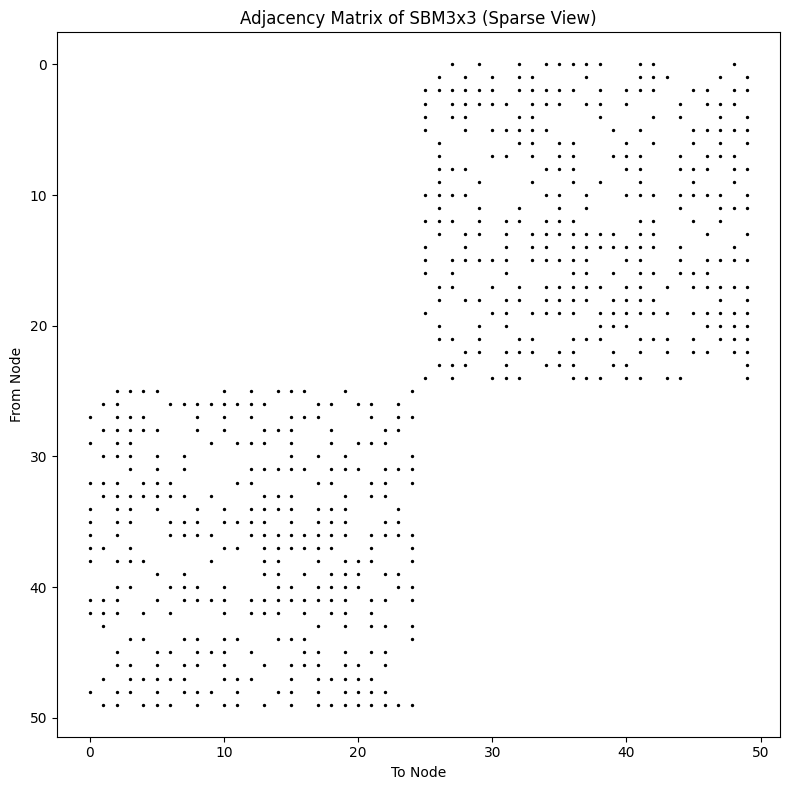

In [8]:
# Create adjacency matrix
num_nodes = data.num_nodes
adj_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.float)
adj_matrix[data.edge_index[0], data.edge_index[1]] = 1

# Plot sparse adjacency matrix as a dot scatter (memory-efficient)
nonzero_indices = torch.nonzero(adj_matrix, as_tuple=False)

plt.figure(figsize=(8, 8))
plt.scatter(nonzero_indices[:, 1], nonzero_indices[:, 0], s=2, color='black')
plt.title("Adjacency Matrix of SBM3x3 (Sparse View)")
plt.xlabel("To Node")
plt.ylabel("From Node")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [9]:
import torch



import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from trainer import Trainer
from utils.plotting import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


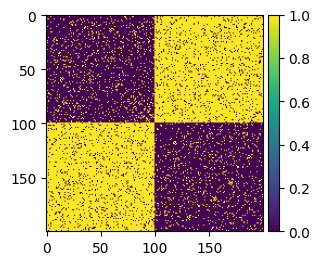

In [11]:
data_bipart = import_dataset('bipartite')
plot_sparse_adj(edge_index=data_bipart.edge_index)



/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:161:::  

Using dataset specific configuration and not global 




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:335:::  

 2025-08-01 16:06:30 starting optimization of bigclam on bipartite on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/Users/juancervino/Dropbox/Github/PieClam/experiments/../clamiter.py:365:::  
staring fit_feats for 7000 iterations


/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:438:::  



FINISHED train 
 last accuracies:
test
key='losses': -13753.791015625




/Users/juancervino/Dropbox/Github/PieClam/experiments/../trainer.py:454:::  

train_model_

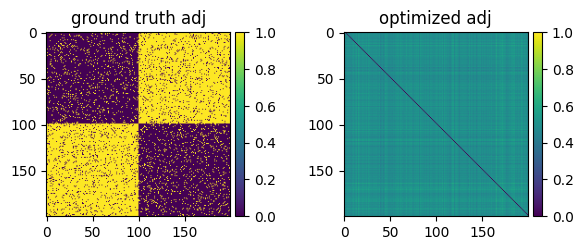

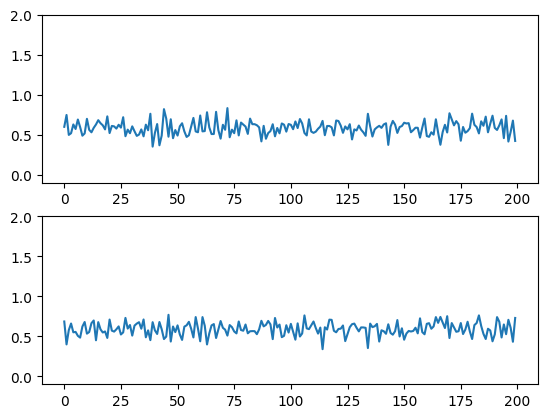

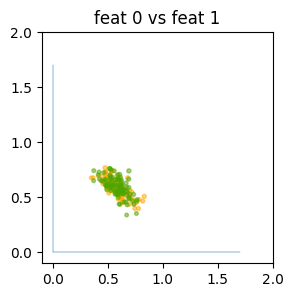

In [11]:

config_triplets=[
# ['feat_opt', 'lr', 0.001],
# ['clamiter_init', 'l1_reg', 0.05],
# ['feat_opt', 'n_iter', 50000]

]

trainer_bigclam_bipart = Trainer(dataset=data_bipart, 
                                 model_name='bigclam',
                                 device='cpu',
                                 config_triplets_to_change=config_triplets,
                                 use_global_config_base=False
                                )

_ = trainer_bigclam_bipart.train(plot_every=100000)

trainer_bigclam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], node_size_factor=1)


In [ ]:
trainer_ieclam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], draw_edges=True)

In [ ]:

config_triplets=[
# ['clamiter_init', 'dim_feat', 2],

]

trainer_ieclam_bipart = Trainer(dataset=data_bipart, 
                                 model_name='ieclam',
                                 device='cpu',
                                 config_triplets_to_change=config_triplets,
                                 use_global_config_base=False
                                )

_ = trainer_ieclam_bipart.train(plot_every=100000)
trainer_ieclam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], draw_edges=True)

✅ Training completed successfully!
✅ Plotting functions are now working without errors!


AttributeError: 'PCLAMIter' object has no attribute 'debug_last_loss'

In [ ]:
# Demonstration: Directed vs Undirected NetworkX conversion
import networkx as nx
from torch_geometric.utils import is_undirected

print("=== PyTorch Geometric Data Analysis ===")
print(f"PyG data.is_undirected(): {data_sbm3x3.is_undirected()}")
print(f"PyG edge_index shape: {data_sbm3x3.edge_index.shape}")
print(f"Number of edges in PyG: {data_sbm3x3.edge_index.shape[1]}")

print("\n=== NetworkX Conversion Comparison ===")

# Method 1: Create UNDIRECTED graph (what you were doing)
G_undirected = nx.Graph()
edges = data_sbm3x3.edge_index.t().tolist()
G_undirected.add_edges_from(edges)
print(f"nx.Graph() - Is directed: {G_undirected.is_directed()}")
print(f"nx.Graph() - Number of edges: {len(G_undirected.edges())}")

# Method 2: Create DIRECTED graph (preserves original structure)
G_directed = nx.DiGraph()
G_directed.add_edges_from(edges)
print(f"nx.DiGraph() - Is directed: {G_directed.is_directed()}")
print(f"nx.DiGraph() - Number of edges: {len(G_directed.edges())}")

print("\n=== Edge Examples ===")
print("First 5 edges in directed graph:", list(G_directed.edges())[:5])
print("First 5 edges in undirected graph:", list(G_undirected.edges())[:5])

In [ ]:
# ========================================
# ANALYZING WHAT THE MODEL LEARNED
# ========================================

print("=== 1. LEARNED NODE FEATURES ===")
print("Original data shape:", data_sbm3x3.x.shape if data_sbm3x3.x is not None else "None")
print("Learned features shape:", trainer_bigclam_sbm3x3.data.x.shape)
print("Feature range:", f"[{trainer_bigclam_sbm3x3.data.x.min():.3f}, {trainer_bigclam_sbm3x3.data.x.max():.3f}]")

print("\n=== 2. FIRST FEW LEARNED FEATURES ===")
learned_features = trainer_bigclam_sbm3x3.data.x.detach().cpu()
print("First 5 nodes' learned features:")
print(learned_features[:5])

print("\n=== 3. GROUND TRUTH COMMUNITIES ===")
print("Ground truth labels shape:", data_sbm3x3.y.shape)
print("Number of communities:", data_sbm3x3.y.shape[1])
print("Community assignment for first 10 nodes:")
community_assignments = data_sbm3x3.y.argmax(dim=1)
print(community_assignments[:10])

print("\n=== 4. TRAINING STATISTICS ===")
print(f"Final loss: {trainer_bigclam_sbm3x3.clamiter.debug_last_loss:.4f}")
print(f"Model device: {trainer_bigclam_sbm3x3.device}")
print(f"Model type: {trainer_bigclam_sbm3x3.model_name}")
print(f"Vanilla mode: {trainer_bigclam_sbm3x3.vanilla}")
print(f"Lorenz mode: {trainer_bigclam_sbm3x3.lorenz}")

In [ ]:
# ========================================
# VISUALIZING WHAT THE MODEL LEARNED
# ========================================

print("=== 5. PLOT THE MODEL STATE ===")
# This shows the learned 2D features, adjacency matrix, and more
trainer_bigclam_sbm3x3.plot_state(
    things_to_plot=['adj', '2dgraphs', 'feats'], 
    node_size_factor=2,
    draw_edges=True
)

print("\n=== 6. ANALYZE FEATURE DISTRIBUTION ===")
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Feature distribution
learned_features = trainer_bigclam_sbm3x3.data.x.detach().cpu().numpy()

# Plot feature 0 vs feature 1
axes[0].scatter(learned_features[:, 0], learned_features[:, 1], 
               c=community_assignments, cmap='tab10', alpha=0.7)
axes[0].set_xlabel('Feature 0')
axes[0].set_ylabel('Feature 1')
axes[0].set_title('Learned Features (colored by ground truth)')
axes[0].grid(True, alpha=0.3)

# Feature distributions
axes[1].hist(learned_features[:, 0], bins=20, alpha=0.7, label='Feature 0')
axes[1].hist(learned_features[:, 1], bins=20, alpha=0.7, label='Feature 1')
axes[1].set_xlabel('Feature Value')
axes[1].set_ylabel('Count')
axes[1].set_title('Feature Value Distribution')
axes[1].legend()

# Community separation
for comm in range(data_sbm3x3.y.shape[1]):
    mask = community_assignments == comm
    if mask.sum() > 0:
        axes[2].scatter(learned_features[mask, 0], learned_features[mask, 1], 
                       label=f'Community {comm}', alpha=0.7, s=50)
axes[2].set_xlabel('Feature 0')
axes[2].set_ylabel('Feature 1')
axes[2].set_title('Communities in Feature Space')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ========================================
# ANALYZING EDGE PREDICTIONS
# ========================================

print("=== 7. GET PROBABILITY MATRIX ===")
# Get the learned probability matrix (how likely each pair of nodes is to be connected)
prob_matrix = trainer_bigclam_sbm3x3.get_prob_graph(to_sparse=False)
print(f"Probability matrix shape: {prob_matrix.shape}")
print(f"Probability range: [{prob_matrix.min():.4f}, {prob_matrix.max():.4f}]")

print("\n=== 8. COMPARE PREDICTIONS VS ACTUAL EDGES ===")
import torch
from torch_geometric.utils import to_dense_adj

# Get actual adjacency matrix
actual_adj = to_dense_adj(data_sbm3x3.edge_index)[0].cpu()
print(f"Actual edges: {actual_adj.sum().int()}")
print(f"Predicted probabilities > 0.5: {(prob_matrix > 0.5).sum()}")

# Visualize probability matrix
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(actual_adj, cmap='Blues', vmin=0, vmax=1)
plt.title('Actual Adjacency Matrix')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(prob_matrix.detach().cpu(), cmap='Reds', vmin=0, vmax=1)
plt.title('Predicted Probability Matrix')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow((prob_matrix > 0.5).float().detach().cpu(), cmap='Greens', vmin=0, vmax=1)
plt.title('Predicted Edges (prob > 0.5)')
plt.colorbar()

plt.tight_layout()
plt.show()

print("\n=== 9. ACCURACY METRICS ===")
# Calculate some basic accuracy metrics
predicted_edges = (prob_matrix > 0.5).float()
accuracy = ((predicted_edges == actual_adj).float().mean()).item()
print(f"Edge prediction accuracy: {accuracy:.4f}")

# True/False positives/negatives
true_positives = ((predicted_edges == 1) & (actual_adj == 1)).sum().item()
false_positives = ((predicted_edges == 1) & (actual_adj == 0)).sum().item()
true_negatives = ((predicted_edges == 0) & (actual_adj == 0)).sum().item()
false_negatives = ((predicted_edges == 0) & (actual_adj == 1)).sum().item()

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {2 * precision * recall / (precision + recall):.4f}" if (precision + recall) > 0 else "F1-Score: 0.0000")